(pvt-esc-rr-np)=
# Уравнение Речфорда-Райса для многофазных систем

[Ранее](SEC-2-RR.md) было получено уравнение Речфорда-Райса, решение которого позволяет определить мольные доли фаз и их компонентные составы по известным константам фазового равновесия и глобальному компонентному составу. В [предыдущем разделе](SEC-3-RR-2P.md) был представлен устойчивый и эффективный алгоритм решения уравнения Речфорда-Райса для двухфазной постановки. Данный раздел посвящен подходам к решению уравнения Речфорда-Райса для многофазных систем.

Исследованию и разработке численных схем решения уравнения Речфорда-Райса в многофазной постановке были посвящены работы \[[Leibovici and Nichita, 2008](https://doi.org/10.1016/j.fluid.2008.03.006);[Okuno et al, 2010](https://doi.org/10.2118/117752-PA); [Pan et al, 2020](https://doi.org/10.1016/j.petrol.2020.108150); [Haugen and Firoozabadi, 2010](https://doi.org/10.1002/aic.12452); [Li and Firoozabadi](https://doi.org/10.1016/j.fluid.2012.06.021); [Iranshahr et al, 2010](https://doi.org/10.1016/j.fluid.2010.09.022)\] и другие.

Стоит отметить, что в подавляющем большинстве случаев при разработке месторождений углеводородов использование двухфазной постановки *(VLE – vapour liquid equilibrium)* при расчете равновесного состояния достаточно и оправдано. В этом случае пренебрегается растворимостью воды, как компонента, в газовой и жидкой углеводородных фазах, а также растворимостью других компонентов в водной фазе, а равновесное состояние рассматривается только между газовой и жидкой углеводородными фазами. На крайний случай, учитывают растворимость компонентов в водной фазе индивидуально по [закону Генри](https://en.wikipedia.org/wiki/Henry%27s_law) при моделировании закачки, например, диоксида углерода \[[Agarwal et al, 1993](https://doi.org/10.2118/93-02-03)\]. Необходимость решения уравнения Речфорда-Райса в многофазной постановке и соответственно проведения многофазного расчета равновесного состояния возникает, например, при разработке месторождений нефти с аномально низкой пластовой температурой газовыми методами: в этом случае в процессе обмена компонентами может наблюдаться формирование двух жидких углеводородных фаз *(VLLE – vapour liquid liquid equilibrium)*. Либо, наоборот, при высоких температурах, когда взаимная растворимость воды и углеводородных компонентов увеличивается. Существует также и ряд других процессов и технологий разработки месторождений углеводородов, для которых многофазный расчет равновесного состояния играет в той или иной степени значимую роль.

Дальнейшее изложение анализа многофазной постановки уравнения Речфорда-Райса и численного метода решения будет основано на работе \[[Okuno et al, 2010](https://doi.org/10.2118/117752-PA)\].

Для многофазной ($N_p$ – количество фаз), многокомпонентной ($N_c$ – количество компонентов) системы, компонентный состав которой задан вектором $\mathbf{y} \in {\rm I\!R}^{N_c}$, система $\left( N_p - 1 \right)$ уравнений Речфорда-Райса записывается следующим образом:

$$ \sum_{i=1}^{N_c} \frac{y_i \left( K_{ji} - 1 \right)}{\sum_{k=1}^{N_p-1} f_k \left( K_{ki} - 1 \right) + 1} = 0, \; j = 1 \, \ldots \, N_p - 1, $$

где $\mathbf{K} \in {\rm I\!R}^{\left( N_p - 1 \right) \times N_c}$ – матрица размерностью $\left( N_p - 1 \right) \times N_c$, а вектор $\mathbf{f} \in {\rm I\!R}^{N_p - 1}$ представляет собой вектор основных переменных – мольных долей фаз.

Преобразуем эту систему уравнений к следующему виду:

$$ r_j \left( \mathbf{f} \right) = \sum_{i=1}^{N_c} \frac{y_i \left( 1 - K_{ji} \right)}{1 - \sum_{k=1}^{N_p-1} f_k \left( 1 - K_{ki} \right)} = 0, \; j = 1 \, \ldots \, N_p - 1, $$

В векторном виде:

$$ \mathbf{r} = \left( 1 - \mathbf{K} \right) \left( \mathbf{y} \oslash \left(1 - \left( 1 - \mathbf{K} \right)^\top \mathbf{f} \right) \right) = 0. $$

В выражении выше символ $\oslash$ обозначает поэлементное деление ([деление Адамара](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)#Analogous_operations)) двух векторов-столбцов, в результате которого также получается вектор-столбец.

Данная система представляет собой систему нелинейных уравнений, для решения (нахождения корня) которой обычно используют [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method#Multidimensional_formulations). Для его применения необходимо составить [якобиан](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant) – матрицу $\mathbf{J} \in {\rm I\!R}^{\left( N_p - 1 \right) \times \left( N_p - 1 \right)}$ производных вектора функций $\mathbf{r} \in {\rm I\!R}^{N_p - 1}$ по вектору основных переменных:

$$ \mathbf{J} = \begin{bmatrix}
\frac{\partial r_1}{\partial f_1} & \frac{\partial r_1}{\partial f_2} & \ldots & \frac{\partial r_1}{\partial f_{N_p-1}} \\
\frac{\partial r_2}{\partial f_1} & \frac{\partial r_2}{\partial f_2} & \ldots & \frac{\partial r_2}{\partial f_{N_p-1}} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial r_{N_p-1}}{\partial f_1} & \frac{\partial r_{N_p-1}}{\partial f_2} & \ldots & \frac{\partial r_{N_p-1}}{\partial f_{N_p-1}}
\end{bmatrix}. $$

Получим выражение для элемента матрицы якобиана:

$$ \begin{align}
\frac{\partial r_j}{\partial f_l}
&= \frac{\partial}{\partial f_l} \left( \sum_{i=1}^{N_c} \frac{y_i \left( 1 - K_{ji} \right)}{1 - \sum_{k=1}^{N_p-1} f_k \left( 1 - K_{ki} \right)} \right) \\
&= \sum_{i=1}^{N_c} \frac{y_i \left( 1 - K_{ji} \right) \left( \sum_{k=1}^{N_p-1} \frac{\partial f_k}{\partial f_l} \left( 1 - K_{ki} \right) \right)}{\left( 1 - \sum_{k=1}^{N_p-1} f_k \left( 1 - K_{ki} \right) \right)^2} \\
&= \sum_{i=1}^{N_c} \frac{y_i \left( 1 - K_{ji} \right) \left( 1 - K_{li} \right)}{\left( 1 - \sum_{k=1}^{N_p-1} f_k \left( 1 - K_{ki} \right) \right)^2} .
\end{align} $$

Пусть

$$ t_i = \left( 1 - \sum_{k=1}^{N_p-1} f_k \left( 1 - K_{ki} \right) \right), $$

тогда выражение для элемента якобиана примет вид:

$$ \frac{\partial r_j}{\partial f_l} = \sum_{i=1}^{N_c} \frac{y_i \left( 1 - K_{ji} \right) \left( 1 - K_{li} \right)}{t_i^2}. $$

Стоит отметить, что полученный якобиан симметричен. Действительно,

$$ \begin{align}
\frac{\partial r_j}{\partial f_l} &= \sum_{i=1}^{N_c} \frac{y_i \left( 1 - K_{ji} \right) \left( 1 - K_{li} \right)}{t_i^2}, \\
\frac{\partial r_l}{\partial f_j} &= \sum_{i=1}^{N_c} \frac{y_i \left( 1 - K_{li} \right) \left( 1 - K_{ji} \right)}{t_i^2}.
\end{align} $$

Значение основных переменных на $\left( k + 1 \right)$-й итерации метода Ньютона для нахождения корня системы нелинейных уравнений определяются следующим образом:

$$ \mathbf{f}_{k+1} = \mathbf{f}_k - \mathbf{J}^{-1} \mathbf{r}_k. $$

С другой стороны, аналогичное выражение для итерации можно записать, если рассматривать данную задачу с точки зрения минимизации некоторой функции $F \left( \mathbf{f} \right) \, : \, {\rm I\!R}^{\left( N_p - 1 \right)} \rightarrow {\rm I\!R}$. В этом случае выражение для [минимизации методом Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization#Higher_dimensions):

$$ \mathbf{f}_{k+1} = \mathbf{f}_k - \mathbf{H}^{-1} \nabla F \left( \mathbf{f} \right), $$

где матрица $\mathbf{H} \in {\rm I\!R}^{\left( N_p - 1 \right) \times \left( N_p - 1 \right)}$ представляет собой матрицу вторых частных производных функции $F \left( \mathbf{f} \right)$, называемую [гессианом](https://en.wikipedia.org/wiki/Hessian_matrix), а вектор $\nabla F \left( \mathbf{f} \right)$ – вектор частных производных функции $F \left( \mathbf{f} \right)$, называемый [градиентом](https://en.wikipedia.org/wiki/Gradient). При этом, эта функция должна быть дважды дифференцируема, а гессиан – симметричной матрицей. Соответственно, поскольку $\mathbf{J}$ также является симметричной матрицей, мы можем поставить знак равенства между двумя этими выражениями. Найдем выражение для функции $F \left( \mathbf{f} \right)$. Для этого необходимо проинтегрировать выражение для элемента градиента этой функции, равного элементу вектора $\mathbf{f}$.

$$ \begin{align}
F \left( \mathbf{f} \right)
&= \int \mathbf{r}^\top \left( \mathbf{f} \right) \, \mathrm{d} \mathbf{f} \\
&= \int \sum_{j=1}^{N_p-1} r_j \left( \mathbf{f} \right) \, \mathrm{d} f_j \\
&= \int \sum_{j=1}^{N_p-1} \sum_{i=1}^{N_c} \frac{y_i \left( 1 - K_{ji} \right)}{1 - \sum_{k=1}^{N_p-1} f_k \left( 1 - K_{ki} \right)} \, \mathrm{d} f_j \\
&= \int \sum_{i=1}^{N_c} \frac{y_i \sum_{j=1}^{N_p-1} \left( 1 - K_{ji} \right) \, \mathrm{d} f_j}{1 - \sum_{k=1}^{N_p-1} f_k \left( 1 - K_{ki} \right)} \\
&= -\int \sum_{i=1}^{N_c} \frac{y_i \, \mathrm{d} \left(1 - \sum_{j=1}^{N_p-1} \left( 1 - K_{ji} \right) f_j \right)}{1 - \sum_{k=1}^{N_p-1} f_k \left( 1 - K_{ki} \right)} \\
&= -\int \sum_{i=1}^{N_c} \frac{y_i \, \mathrm{d} t_i}{t_i} \\
&= - \sum_{i=1}^{N_c} y_i \int \frac{\mathrm{d} t_i}{t_i} \\
&= - \sum_{i=1}^{N_c} y_i \ln \left| t_i \right| + C,
\end{align} $$

где $C$ – некоторая константа.

Теперь покажем, что данная функция выпуклая.

````{margin}
```{admonition} Дополнительно
Необходимо отметить, что в процессе доказательства выпуклости функции $F \left( \mathbf{f} \right)$ использовались величины $\sqrt{y_i},$ что допустимо только в том случае, когда глобальные мольные доли компонентов неотрицательны. Однако в ряде задач в PVT-моделировании могут рассматриваться случаи с отрицательными мольными долями компонентов. Например, в задачах определения минимального давления смешивания \[[Wang and Orr, 1997](https://doi.org/10.1016/S0378-3812(97)00179-9)\]. В этом случае гессиан не является положительно полуопределенной матрицей, а сама функция $F \left( \mathbf{f} \right)$ не является выпуклой в чистом виде.

[comment]: <> (Для использования метода Ньютона в случае, когда гессиан не является положительно полуопределенной матрицей, допустимо применять модифицированное разложение Холецкого.)
```
````

```{admonition} Доказательство
:class: proof

Для того чтобы доказать, что функция от нескольких переменных является выпуклой, [необходимо](https://en.wikipedia.org/wiki/Convex_function#Functions_of_several_variables) доказать, что ее гессиан является [положительно полуопределенной матрицей](https://en.wikipedia.org/wiki/Definite_matrix). Матрица является положительно полуопределенной, если все ее [собственные значения](../../0-Math/0-LAB/LAB-7-Eigenvalues-Eigenvectors.md) неотрицательны, что [равносильно](../../0-Math/1-OM/OM-0-Introduction.md) следующему неравенству:

$$ \mathbf{x}^\top \mathbf{H} \mathbf{x} \geq 0, \; \forall \, \mathbf{x} \in {\rm I\!R}^{\left( N_p - 1 \right)}. $$

Для доказательства данного неравенства для гессиана полученной ранее функции преобразуем выражение для элемента матрицы гессиана к следующему виду:

$$ \frac{\partial r_j}{\partial f_l} = \sum_{i=1}^{N_c} \frac{y_i \left( 1 - K_{ji} \right) \left( 1 - K_{li} \right)}{t_i^2} = \sum_{i=1}^{N_c} \frac{\sqrt{y_i} \left( 1 - K_{ji} \right)}{t_i} \frac{\sqrt{y_i} \left( 1 - K_{li} \right)}{t_i} = \sum_{i=1}^{N_c} P_{ji} P_{li}. $$

Таким образом, гессиан рассматриваемой функции может быть представлен в виде произведения матрицы $\mathbf{P} \in {\rm I\!R}^{\left( N_p - 1 \right) \times N_c}$ и ее транспонированного вида:

$$ \mathbf{H} = \mathbf{P} \mathbf{P}^\top. $$

Тогда

$$ \mathbf{x}^\top \mathbf{H} \mathbf{x} = \mathbf{x}^\top \mathbf{P} \mathbf{P}^\top \mathbf{x} = \left( \mathbf{P}^\top \mathbf{x} \right)^\top \left( \mathbf{P}^\top \mathbf{x} \right) = \mathbf{v}^\top \mathbf{v} = \sum_{i=1}^{N_c} v_i^2 \geq 0. $$

В процессе данного преобразования было использовано свойство транспонирования произведения:

$$ \left( \mathbf{P} \mathbf{B} \right)^\top = \mathbf{B}^\top \mathbf{P}^\top, $$

доказанное [ранее](../../0-Math/1-OM/OM-0-Introduction.md).

```

Таким образом, было показано, что гессиан функции $F \left( \mathbf{f} \right)$ является положительно полуопределенной матрицей, а сама функция – выпуклой. Следовательно, задачу решения системы уравнений Речфорда-Райса можно переформулировать с точки зрения минимизации функции $F \left( \mathbf{f} \right)$. Однако, данная функция, как и в случае [двухфазной постановки](SEC-3-RR-2P.md), характеризуется наличием $N_c$ полюсов, определяемых выражением $t_i = 0, \; i = 1 \, \ldots \, N_c$. Таким образом, для устойчивого нахождения минимума функции необходимо определить [область допустимых решений](https://en.wikipedia.org/wiki/Feasible_region). Эта область, как и в случае с двухфазной постановкой, определяется *negative flash window (NF-window)*, формулируемая из условия неотрицательности мольных долей компонентов в фазах, но допускающая существование отрицательных мольных долей фаз.

Мольная доля $i$-го компонента в референсной фазе, обозначим ее $x_i$, [определяется](SEC-2-RR.md) следующим выражением:

$$ x_i = \frac{y_i}{\sum_{k=1}^{N_p-1} f^k \left( K_{ki} - 1 \right) + 1} = \frac{y_i}{1 - \sum_{k=1}^{N_p-1} f_k \left( 1 - K_{ki} \right)} = \frac{y_i}{t_i}. $$

NF-window предполагает, что мольные доли компонентов во всех фазах находятся на отрезке $\left[0; \, 1 \right]$, следовательно:

$$ 0 \leq x_i \leq 1 \, \Rightarrow \, 0 \leq \frac{y_i}{t_i} \leq 1 \, \Rightarrow \, 0 \leq y_i \leq t_i. $$

Аналогично рассмотрим мольные доли компонентов в остальных, нереференсных, фазах:

$$ 0 \leq y_{ji} \leq 1 \, \Rightarrow \, 0 \leq K_{ji} x_i \leq 1 \, \Rightarrow \, 0 \leq K_{ji} \frac{y_i}{t_i} \leq 1 \, \Rightarrow \, 0 \leq y_i K_{ji} \leq t_i. $$

Таким образом, можно записать следующую систему неравенств, определяющую область допустимых решений:

$$ \begin{cases}
t_i \geq y_i, \; i = 1 \, \ldots \, N_c, \\
t_i \geq y_i K_{ji} \; i = 1 \, \ldots \, N_c, \; j = 1 \, \ldots \, N_p - 1.
\end{cases} $$

Подставив выражение для $t_i$ в данную систему неравенств, получим:

$$ \begin{cases}
\sum_{k=1}^{N_p-1} f_k \left( 1 - K_{ki} \right) \leq 1 - y_i, \; i = 1 \, \ldots \, N_c, \\
\sum_{k=1}^{N_p-1} f_k \left( 1 - K_{ki} \right) \leq 1 - K_{ji} y_i,  \; i = 1 \, \ldots \, N_c, \; j = 1 \, \ldots \, N_p - 1.
\end{cases} $$

Левую часть в данных неравенствах можно представить в виде вектора, $i$-ый элемент которого определяется выражением $\mathbf{f}^\top \mathbf{a}_i$, где $\mathbf{a}_i \in {\rm I\!R}^{\left( N_p - 1 \right)}, \, i = 1 \, \ldots \, N_c,$ представляет собой $i$-ый столбец матрицы $\mathbf{A} = \left( 1 - K_{ji} \right), \, j = 1 \, \ldots \, N_p - 1, \, i = 1 \, \ldots \, N_c$. Кроме того, $i$-ыe элементы этого вектора, согласно записанной выше системе неравенств, должны быть меньше (или равны) соответствующих значений $\left( 1 - y_i \right)$ и меньше (или равны) соотвутствующих значений $\left( 1 - K_{ji} y_i \right)$ среди всех фаз, за исключением референсной, то есть $j = 1 \, \ldots \, N_p - 1$. Поскольку $i$-ыe элементы этого вектора должны быть меньше (или равны) соответствующих значений $\left( 1 - K_{ji} y_i \right)$ среди всех фаз, следовательно, они должны быть меньше или равны минимальных соответствующих значений среди вседи всех фаз, то есть $\min_j \left\{ 1 - K_{ji} y_i \right\}$. С учетом этого, систему неравенств можно записать следующим образом:

$$ \mathbf{f}^\top \mathbf{a}_i \leq b_i = \min \left\{ 1 - y_i, \, \min_j \left\{ 1 - K_{ji} y_i \right\} \right\}, \; i = 1 \, \ldots \, N_c. $$

Таким образом, решение системы уравнений Речфорда-Райса можно эквивалентно заменить задачей оптимизации:

$$ \begin{alignat}{1}
\mathrm{min} & \;\;\;\;\;\;\; && F \left( \mathbf{f} \right) \\
\mathrm{subject\,to} &&& \mathrm{f}^\top \mathrm{a}_i \leq b_i, \, i = 1 \, \ldots \, N_c
\end{alignat} $$

Стоит отметить, что полученная область допустимых решений, определяемая $\mathbf{f}^\top \mathbf{a}_i \leq b_i, \; i = 1 \, \ldots \, N_c$, не содержит полюсы ($t_i = 0, \, i = 1 \, \ldots \, N_c$) и меньше области допустимых решений, используемой в работе \[[Leibovici and Nichita, 2008](https://doi.org/10.1016/j.fluid.2008.03.006)\] и определямой условием $t_i \geq 0$.

Прежде чем переходить к формулированию алгоритма, рассмотрим следующий пример.

````{admonition} Пример
:class: exercise
Пусть матрица констант фазового равновесия $\mathbf{K} \in {\rm I\!R}^{\left( N_p - 1 \right) \times N_c}$ и вектор глобального компонентного состава системы $\mathbf{y} \in {\rm I\!R}^{N_c}$ заданы следующим образом:

``` python
import numpy as np
Kji = np.array([
    [2.64675, 1.16642, 1.25099E-03],
    [1.83256, 1.64847, 1.08723E-02],
]) # K-values
yi = np.array([0.3, 0.4, 0.3]) # Global component composition
```

Необходимо отобразить область допустимых решений для задачи оптимизации функции $F \left( \mathbf{f} \right)$.

````

In [1]:
import numpy as np
Kji = np.array([
    [2.64675, 1.16642, 1.25099E-03],
    [1.83256, 1.64847, 1.08723E-02],
]) # K-values
yi = np.array([0.3, 0.4, 0.3]) # Global component composition

В соответствии с изложенным выше, область допустимых решений определяется следующим выражением:

$$ \mathbf{f}^\top \mathbf{a}_i \leq b_i, \; i = 1 \, \ldots \, N_c. $$

Для трехфазного трехкомпонентного случая данная система неравенств преобразуется в:

$$ \begin{cases}
f_1 \left( 1 - K_{11} \right) + f_2 \left( 1 - K_{21} \right) \leq b_1, \\
f_1 \left( 1 - K_{12} \right) + f_2 \left( 1 - K_{22} \right) \leq b_2, \\
f_1 \left( 1 - K_{13} \right) + f_2 \left( 1 - K_{23} \right) \leq b_3. \\
\end{cases} $$

Для рассматриваемого примера значения матрицы $\mathbf{A} = \left( 1 - \mathbf{K} \right)$:

In [2]:
Aji = 1. - Kji
Aji

array([[-1.64675   , -0.16642   ,  0.99874901],
       [-0.83256   , -0.64847   ,  0.9891277 ]])

С учетом знаков $\left( 1 - \mathbf{K}_{2,i} \right), \, i = 1 \, \ldots \, N_c,$ преобразуем систему неравенств для рассматриваемого примера к следующему виду:

$$ \begin{cases}
f_2 \geq - \frac{1 - K_{11}}{1 - K_{21}} f_1 + \frac{b_1}{1 - K_{21}}, \\
f_2 \geq - \frac{1 - K_{12}}{1 - K_{22}} f_1 + \frac{b_2}{1 - K_{22}}, \\
f_2 \leq - \frac{1 - K_{13}}{1 - K_{23}} f_1 + \frac{b_3}{1 - K_{23}}. \\
\end{cases} $$

Также в соответствии с изложенным выше значения вектора $\mathbf{b} \in {\rm I\!R}^{N_c}$ определяются следующими выражениями:

$$
b_1 = \min \left\{ 1 - y_1, \, \min \left\{ 1 - K_{11} y_1, \, 1 - K_{21} y_1 \right\} \right\}, \\
b_2 = \min \left\{ 1 - y_2, \, \min \left\{ 1 - K_{12} y_2, \, 1 - K_{22} y_2 \right\} \right\}, \\
b_3 = \min \left\{ 1 - y_3, \, \min \left\{ 1 - K_{13} y_3, \, 1 - K_{23} y_3 \right\} \right\}. \\
$$

Получим значения элементов вектора $\mathbf{b}$:

In [3]:
bi = np.min([np.min(1. - Kji * yi, axis=0), 1. - yi], axis=0)

Тогда прямые, ограничивающие область допустимых решений:

In [4]:
f1 = np.array([-3., 4.])
f2 = (-Aji[0] / Aji[1])[:,None] * f1 + (bi / Aji[1])[:,None]

Кроме того, вычислим значения функции $F \left( \mathbf{f} \right)$ для рассматриваемой задачи с целью последующего отображения на графике в виде контуров:

In [5]:
fs1 = np.linspace(-3., 4., 100, endpoint=True)
fs2 = np.linspace(-3., 4., 100, endpoint=True)
fssj = np.dstack(np.meshgrid(fs1, fs2))
tssi = 1. - fssj.dot(Aji)
Fss = - np.log(np.abs(tssi)).dot(yi)

Как было отмечено ранее, эта функция характеризуется наличием полюсов, определяемых уравнением $t_i = 0, \, i = 1 \, \ldots \, N_c$. Получим координаты прямых, представляющих собой эти полюсы:

In [6]:
p1 = np.array([-3., 4.])
p2 = (-Aji[0] / Aji[1])[:,None] * f1 + (1. / Aji[1])[:,None]

Представим все это в графическом виде:

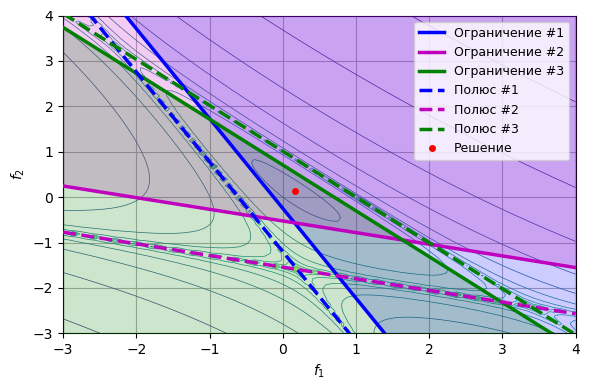

In [7]:
from matplotlib import pyplot as plt
fig1, ax1 = plt.subplots(1, 1, figsize=(6., 4.), tight_layout=True)
ax1.fill_between(f1, f2[0], [4., 4.], color='b', alpha=0.2, zorder=3)
ax1.fill_between(f1, f2[1], [4., 4.], color='m', alpha=0.2, zorder=3)
ax1.fill_between(f1, f2[2], [-3., -3.], color='g', alpha=0.2, zorder=3)
ax1.plot(f1, f2[0], lw=2.5, c='b', zorder=4, label='Ограничение #1')
ax1.plot(f1, f2[1], lw=2.5, c='m', zorder=4, label='Ограничение #2')
ax1.plot(f1, f2[2], lw=2.5, c='g', zorder=4, label='Ограничение #3')
ax1.plot(p1, p2[0], ls='--', lw=2.5, c='b', zorder=4, label='Полюс #1')
ax1.plot(p1, p2[1], ls='--', lw=2.5, c='m', zorder=4, label='Полюс #2')
ax1.plot(p1, p2[2], ls='--', lw=2.5, c='g', zorder=4, label='Полюс #3')
ax1.plot(0.162565, 0.125678, 'o', mec='r', mfc='r', ms=4., lw=0., zorder=4, label='Решение')
ax1.contour(fssj[:,:,0], fssj[:,:,1], Fss, 15, linewidths=0.5, zorder=2)
ax1.set_xlabel('$f_1$')
ax1.set_xlim(-3., 4.)
ax1.set_ylabel('$f_2$')
ax1.set_ylim(-3., 4.)
ax1.legend(loc=1, fontsize=9)
ax1.grid(zorder=1)

Серый треугольник в центре, ограниченный сплошными прямыми является областью допустимых решений, определяемой выражением $\mathbf{f}^\top \mathbf{a}_i \leq b_i, \, i = 1 \, \ldots \, N_c$, причем эта область не содержит полюсы и несколько меньше области допустимых решений (треугольника), ограниченной пунктирными линиями и определяемой выражением $t_i \geq 0, \, i = 1 \, \ldots \, N_c$.

Рассмотрим одну итерацию оптимизации функции $F \left( \mathbf{f} \right)$ для рассматриваемого примера:

$$ \mathbf{f}_{k+1} = \mathbf{f}_k - \lambda \mathbf{H}^{-1} \nabla F \left( \mathbf{f}_k \right). $$

Пусть длина шага $\lambda = 1$, а значения мольных долей фаз на $k$-й итерации $\mathbf{f}_k$ заданы следующим вектором:

In [8]:
fjk = np.array([-0.75, 1.35])

В этой точке значение функции $F \left( \mathbf{f}_k \right)$:

In [9]:
ti = 1. - fjk.dot(Aji)
F = - np.log(np.abs(ti)).dot(yi)
F

np.float64(0.07610118311141709)

Определим значения вектора мольных долей фаз на $\left( k + 1 \right)$-й итерации. Для этого вычислим значения градиента минимизируемой функции:

In [10]:
dFj = Aji.dot(yi / ti)
dFj

array([0.13038645, 0.28805392])

Получим значения гессиана:

In [11]:
Pji = np.sqrt(yi) / ti * Aji
Hjl = Pji.dot(Pji.T)
Hjl

array([[2.78139167, 2.26595438],
       [2.26595438, 2.03270276]])

Определим направление оптимизации $\Delta \mathbf{f} = -\mathbf{H}^{-1} \nabla F \left( \mathbf{f}_k \right)$:

In [12]:
dfj = -np.linalg.inv(Hjl).dot(dFj)
dfj

array([ 0.74669718, -0.97409012])

Тогда значения мольных долей фаз на $\left( k + 1 \right)$-й итерации:

In [13]:
fjkp1 = fjk + dfj
fjkp1

array([-0.00330282,  0.37590988])

Отобразим эту итерацию графически:

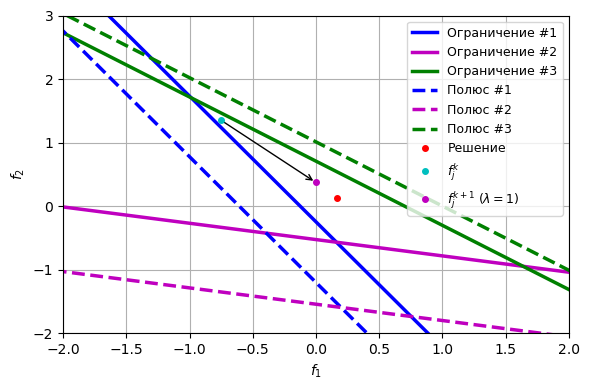

In [14]:
fig2, ax2 = plt.subplots(1, 1, figsize=(6., 4.), tight_layout=True)
ax2.plot(f1, f2[0], lw=2.5, c='b', zorder=2, label='Ограничение #1')
ax2.plot(f1, f2[1], lw=2.5, c='m', zorder=2, label='Ограничение #2')
ax2.plot(f1, f2[2], lw=2.5, c='g', zorder=2, label='Ограничение #3')
ax2.plot(p1, p2[0], ls='--', lw=2.5, c='b', zorder=2, label='Полюс #1')
ax2.plot(p1, p2[1], ls='--', lw=2.5, c='m', zorder=2, label='Полюс #2')
ax2.plot(p1, p2[2], ls='--', lw=2.5, c='g', zorder=2, label='Полюс #3')
ax2.plot(0.162565, 0.125678, 'o', mec='r', mfc='r', ms=4., lw=0., zorder=4, label='Решение')
ax2.plot(*fjk, 'o', mec='c', mfc='c', ms=4., lw=0., zorder=4, label='$f_j^k$')
ax2.plot(*fjkp1, 'o', mec='m', mfc='m', ms=4., lw=0., zorder=4,
         label=r'$f_j^{k+1}$ $\left(\lambda = 1\right)$')
ax2.annotate('', fjk, fjkp1, arrowprops=dict(arrowstyle='<-'))
ax2.set_xlabel('$f_1$')
ax2.set_xlim(-2., 2.)
ax2.set_ylabel('$f_2$')
ax2.set_ylim(-2., 3.)
ax2.legend(loc=1, fontsize=9)
ax2.grid(zorder=1)

Из данного графика видно, что при несколько большей длине шага в этом же направлении можно еще лучше приблизиться к искомому решению – минимуму функции $F \left( \mathbf{f} \right)$. Действительно, построим зависимость этой функции от длины шага в выбранном направлении. Зададимся диапазоном значений длины шага:

In [15]:
lmbds = np.linspace(0., 2., 100, endpoint=True)

Вычислим значения функции $F \left( \mathbf{f} \right)$ для каждой длины шага итерации:

In [16]:
fsjkp1 = fjk + dfj * lmbds[:,None]
tsi = 1. - fsjkp1.dot(Aji)
Fs = - np.log(np.abs(tsi)).dot(yi)

Построим график:

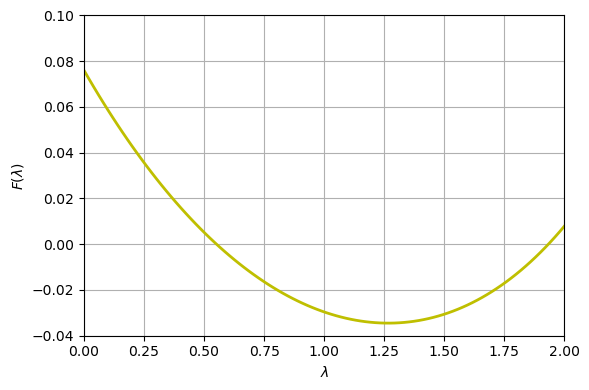

In [17]:
fig3, ax3 = plt.subplots(1, 1, figsize=(6., 4.), tight_layout=True)
ax3.plot(lmbds, Fs, lw=2., c='y', zorder=2)
ax3.set_xlim(0., 2.)
ax3.set_xlabel(r'$\lambda$')
ax3.set_ylim(-0.04, 0.1)
ax3.set_ylabel(r'$F \left( \lambda \right)$')
ax3.grid(zorder=1)

Видно, что при $\lambda \approx 1.25$ значения функции меньше всего. Таким образом, ньютоновскую итерацию можно дополнить *процедурой поиска длины шага (line search)*, исходя из условия минимизации искомой функции для заданного направления. При этом, необходимо соблюдать ограничения области допустимых решений. Это позволит, с одной стороны, сократить количество ньютоновских итераций, с другой стороны, поможет избежать "перелета" в тех случаях, когда минимум функции близок к границам области допустимых решений. Получим максимальное значение длины шага. Для этого подставим выражение для мольных долей фаз на $\left( k + 1 \right)$-й итерации $\mathbf{f}_{k+1} = \mathbf{f}_k + \Delta \mathbf{f}$ в систему $N_c$ неравенств, определяющих область допустимых решений:

$$ \begin{align}
\mathbf{f}_{k+1}^\top \mathbf{a}_i & \leq b_i, \; i = 1 \, \ldots \, N_c, \\
\left( \mathbf{f}_k + \lambda \Delta \mathbf{f} \right)^\top \mathbf{a}_i & \leq b_i, \; i = 1 \, \ldots \, N_c, \\
\mathbf{f}_k^\top \mathbf{a}_i + \lambda \Delta \mathbf{f}^\top \mathbf{a}_i & \leq b_i, \; i = 1 \, \ldots \, N_c, \\
\lambda \Delta \mathbf{f}^\top \mathbf{a}_i & \leq b_i - \mathbf{f}_k^\top \mathbf{a}_i, \; i = 1 \, \ldots \, N_c. \\
\end{align} $$

С учетом знака $i$-ого значения $\Delta \mathbf{f}^\top \mathbf{a}_i, \, i = 1 \, \ldots \, N_c,$ данная система неравенств преобразуется к системе двойных неравенств, определяющих допустимые значения длины шага, исходя из условий области допустимых решений. Поскольку величина длины шага должна быть больше всех значений $i$, удовлетворяющих условию $\Delta \mathbf{f}^\top \mathbf{a}_i < 0$, то величина длины шага должна быть больше максимального среди всех значений, удовлетворяющих данному условию. Поскольку величина длины шага должна быть меньше всех значений $i$, удовлетворяющих условию $\Delta \mathbf{f}^\top \mathbf{a}_i > 0$, то величина длины шага должна быть меньше минимального среди всех значений, удовлетворяющих данному условию. Иными словами, длина шага итерации находится на следующем отрезке:

$$ \max_i \left\{ \frac{b_i - \mathbf{f}_k^\top \mathbf{a}_i}{\Delta \mathbf{f}^\top \mathbf{a}_i} \, : \, \Delta \mathbf{f}^\top \mathbf{a}_i < 0 \right\} \leq \lambda \leq \min_i \left\{ \frac{b_i - \mathbf{f}_k^\top \mathbf{a}_i}{\Delta \mathbf{f}^\top \mathbf{a}_i} \, : \, \Delta \mathbf{f}^\top \mathbf{a}_i > 0 \right\}. $$

Символ двоеточия в данном выражении заменяет фразу "такие, что" или "удовлетворяющие условию".

Получим минимальное и максимальное значения длины шага для рассматриваемого примера:

In [18]:
lmbdi = (bi - fjk.dot(Aji)) / (dfj.dot(Aji))
where_max = dfj.dot(Aji) < 0.
where_min = np.logical_not(where_max)
np.max(lmbdi[where_max]), np.min(lmbdi[where_min])

(np.float64(-0.22661381481569384), np.float64(2.1506214393304166))

Для минимизации функции $F \left( \lambda \right)$ также можно использовать метод Ньютона:

$$ \lambda_{l+1} = \lambda_l - \frac{F'_\lambda \left( \lambda_l \right)}{F''_{\lambda \lambda} \left( \lambda_l \right)}. $$

Значения первой и второй производных:

Таким образом, сформулируем алгоритм решения системы уравнений Речфорда-Райса.

```{eval-rst}
.. role:: comment
    :class: comment
```

```{admonition} Алгоритм. Решение системы уравнений Речфорда-Райса для многофазных систем
:class: algorithm

**Дано:** Матрица констант фазового равновесия $\mathbf{K} \in {\rm I\!R}^{\left( N_p - 1 \right) \times N_c}$; вектор компонентного состава системы $\mathbf{y} \in {\rm I\!R}^{N_c}$; вектор начальных приближений мольных долей фаз $\mathbf{f}_0 \in {\rm I\!R}^{N_p - 1}$; максимальное число итераций $N_{iter}$; точность решения уравнения $\epsilon$.

**Определить:** Вектор мольных долей фаз, удовлетворяющий NF-window и являющийся корнем системы уравнений Речфорда-Райса.

**Псевдокод:**  
$\mathbf{f} := \mathbf{f}_0$ {comment}`# Начальное приближение`  
$\mathbf{A} := 1 - \mathbf{K}$  
$\mathbf{t} := 1 - \mathbf{f}^\top \mathbf{A}$  
$\nabla F := A \left( \mathbf{y} \oslash \mathbf{t} \right)$ {comment}`# Градиент`  
$\mathbf{P} := A \left( \sqrt{\mathbf{y}} \oslash \mathbf{t} \right)$  
$\mathbf{H} := \mathbf{P} \mathbf{P}^\top$ {comment}`# Гессиан`  
$\Delta \mathbf{f} := - \mathbf{H}^{-1} \nabla F$ {comment}`# Направление итерации`  
&emsp;
```


[Следующий раздел](SEC-5-Equilibrium.md) будет посвящен определению равновесного состояния, проводимому, если в результате [проверки стабильности](SEC-1-Stability.md) рассматриваемое фазовое состояние системы оказалось нестабильным.